In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
 
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
 
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
 
# 회귀분석
import statsmodels.formula.api as smf
 
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
 
# Random Forest
from sklearn.ensemble import RandomForestRegressor
 
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
 
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
# matplotlib.rc('font', family = 'Malgun Gothic')
# matplotlib('axes', unicode_minus = False)

In [7]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
 
# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### 연습 (187쪽)

In [5]:
df_raw = pd.read_csv('/content/drive/MyDrive/체질검사.csv')

In [6]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

In [9]:
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(176, 13)
(176,)
(76, 13)
(76,)


**예측 모델 생성**

In [10]:
# 회귀 모델
lr_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())
 
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
dt_model.fit(df_train_x, df_train_y)
 
# Random Forest
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)
 
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, 
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           4.38e-68
Time:                        05:12:45   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [11]:
# 예측 및 평가

# models = ['회귀분석', '의사결정나무', '랜덤 포레스트', '그래디언트 부스팅']
models = ['Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
mse, rmse, mae, mape = [], [], [], []

In [12]:
# 예측

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))


dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))


rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))


gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

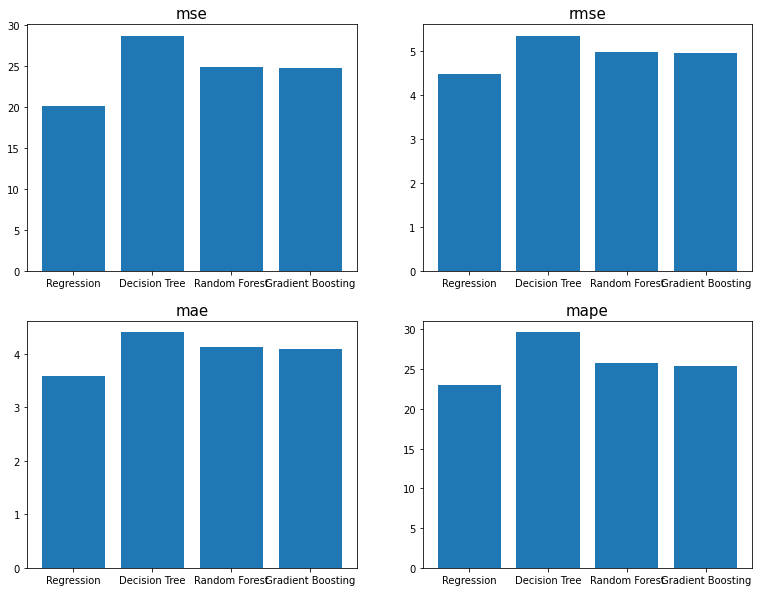

In [13]:
# 시각화

fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)
 
ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)
 
ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)
 
ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)
